**Trimble Data Engineer Question 1b**

In [5]:
import pandas as pd

In [ ]:
def return_upper(df = name_table):
    # create new dataframe version of name_table
    name_table_new = df.copy()
    
    # iterate through each name in the Name column of new version
    for name in name_table_new['Name']:
        
        # check if name contains an e
        if 'e' in name.lower():
            # replace name with uppercase version
            name_table_new['Name'] = name_table_new['Name'].replace([name], name.upper())
            
        # name does not contain an e
        else:
            # replace name with lowercase version
            name_table_new['Name'] = name_table_new['Name'].replace([name], name.lower())
        
        # return new dataframe version
        return name_table_new

**Trimble Data Engineer Question 1c**

In [ ]:
def summary(func = return_upper(name_table), df = mark_table):
    
    # merge new name_table version and mark_table on StudentID
    df3 = pd.merge(func, df, on='StudentID')
    
    # counter for uppercase and lowercase names and how many there are
    upper = 0
    lower = 0
    countUpper = 0
    countLower = 0
    
    # iterate through new version of names
    for i in df3['Name']:
        
        # if the name is uppercase - locate the corresponding grade and assign grade to upper
        if i.isupper():
            upper += df3.loc[df3['Name'] == i, 'Grade'].iloc[0]
            countUpper += 1
            
        # if the name is lowercase - locate the corresponding grade and assign grade lower
        else:
            lower += df3.loc[df3['Name'] == i, 'Grade'].iloc[0]
            countLower += 1
    
    # calculate the average of names that are uppercase and lowercase
    upper = upper/countUpper
    lower = lower/countLower

In [ ]:
# create list of tuples containing average grade of uppercase and lowercase
summ = [
    ('Uppercase', upper),
    ('Lowercase', lower)
]

# create datafram with respective columns
summary_df = pd.DataFrame(summ, columns = [['Name Type', 'Average Grade']])
summary_df

**Trimble Data Engineer Question 2a**

In [11]:
df = pd.read_csv('trimble_data.csv')
df.head(5)

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [12]:
# drop nulls
df.dropna(axis = 0, how = 'any', inplace = True)

df.isnull().sum()

NAME              0
STATUS            0
SALARY            0
PAY BASIS         0
POSITION TITLE    0
dtype: int64

In [13]:
# reformat salary from str to int
df['SALARY'] = df['SALARY'].str.strip('$').str.replace(',','').astype(float)
df['SALARY'] = df['SALARY'].astype(int)

df.head(5)

,NAME,STATUS,SALARY,PAY BASIS,POSITION TITLE
0,"Alexander, Monica K.",Employee,56000,Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,140000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,94000,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,77000,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT


In [14]:
# convert categorical status column to quantitative
df2 = pd.get_dummies(df[['STATUS']])

# create new df with new quantitative values instead of categorical
df3 = pd.merge(df, df2, left_index = True, right_index = True)

#drop old categorical status column
df3.drop('STATUS', axis = 1, inplace = True)

df3.head(5)

,NAME,SALARY,PAY BASIS,POSITION TITLE,STATUS_Detailee,STATUS_Employee
0,"Alexander, Monica K.",56000,Per Annum,EXECUTIVE ASSISTANT,0,1
1,"Ambrosini, Michael J.",95000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,0,1
2,"Amin, Stacy C.",140000,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...,0,1
3,"Andersen, Whitney N.",94000,Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...,0,1
4,"Anderson, Alexander J.",77000,Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT,0,1


**Trimble Data Engineer Question 2b**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv('data.csv')
df.head(5)

,0,23.82729036706873
0,1,23.589108
1,2,24.529556
2,3,16.684580
3,4,22.075507
4,5,21.892569


In [17]:
# rename columns
df.rename(columns = {'0':'a', '23.82729036706873':'b'}, inplace = True)

df.head()

,a,b
0,1,23.589108
1,2,24.529556
2,3,16.684580
3,4,22.075507
4,5,21.892569


In [18]:
# descriptive statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
a,9999.0,5000.000000,2886.607005,1.000000,2500.50000,5000.000000,7499.50000,9999.000000
b,9999.0,23.035996,2.995436,11.248686,21.00717,23.024031,25.06937,33.286533


/Users/meehirbhalla/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Value of b')

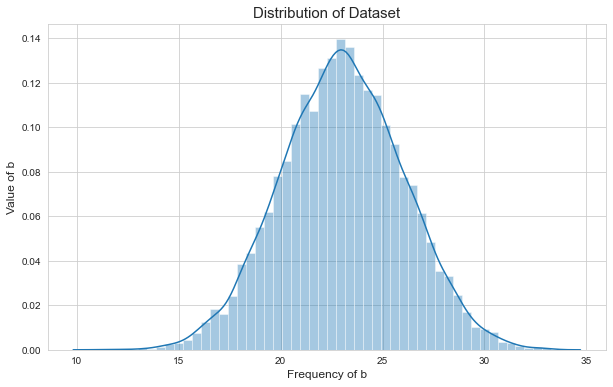

In [19]:
# distribution of data using seaborn
sns.set_style(style = 'whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(df['b'])
plt.title('Distribution of Dataset', fontsize = 15)
plt.xlabel('Frequency of b', fontsize = 12)
plt.ylabel('Value of b', fontsize = 12)
# Gaussian distribution

In [20]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [21]:
init_notebook_mode(connected=True)
cf.go_offline()

In [22]:
# interactive distribution of data using plotly and cufflinks
df['b'].iplot(kind='hist',bins=25, title = 'Distribution of Dataset',
              xTitle = 'Frequency of b', yTitle = 'Value of b', color = 'blue')